<a href="https://colab.research.google.com/github/Shritej24c/Trading-Bot-RL/blob/Sarthak/RL_BOT_AIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
!python --version

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines==2.10.1 gym_anytrading==1.2.0 gym==0.19.0

In [ ]:
!pip install gast==0.3.2

In [ ]:
!pip install gym-anytrading

In [ ]:
!pip install stable_baselines

In [9]:
import gym
print(gym.__version__)

0.19.0


In [ ]:
!pip install tensorflow==1.15

In [ ]:
!pip install gast>=0.3.2

In [ ]:
!pip install yfinance

In [ ]:
!pip install finta

In [ ]:
import gym
import stable_baselines

In [15]:
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C,PPO2

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
import yfinance as yf

msft = yf.Ticker("MSFT")
print(msft)

yfinance.Ticker object <MSFT>


In [17]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 221000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise

In [18]:
msft.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055536,0.063703,0.055536,0.060980,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060980,0.064247,0.060980,0.063158,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.063158,0.064792,0.063158,0.064247,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064247,0.064792,0.062069,0.062613,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062613,0.063158,0.060980,0.061524,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-25 00:00:00-04:00,247.259995,251.039993,245.830002,250.660004,34775500,0.0,0.0
2022-10-26 00:00:00-04:00,231.169998,238.300003,230.059998,231.320007,82543200,0.0,0.0
2022-10-27 00:00:00-04:00,231.039993,233.690002,225.779999,226.750000,40424600,0.0,0.0


In [19]:
df_msft = yf.download('MSFT', start = '2016-01-01', end = '2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [20]:
#df_msft = yf.download('MSFT', start = '2016-01-01', end = '2022-01-01')
df_msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,49.269157,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,49.493923,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,48.594849,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.904591,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,47.048450,48754000


In [21]:
df_msft.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [22]:
df_msft.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)

In [23]:
df_msft.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [24]:
import gym, gym_anytrading

In [25]:
env = gym.make('stocks-v0', df=df_msft, frame_bound=(5,100), window_size=5)

In [26]:
#env.signal_features

In [27]:
env.action_space

Discrete(2)

info {'total_reward': -0.029998779296875, 'total_profit': 0.6859566705703983, 'position': 0}


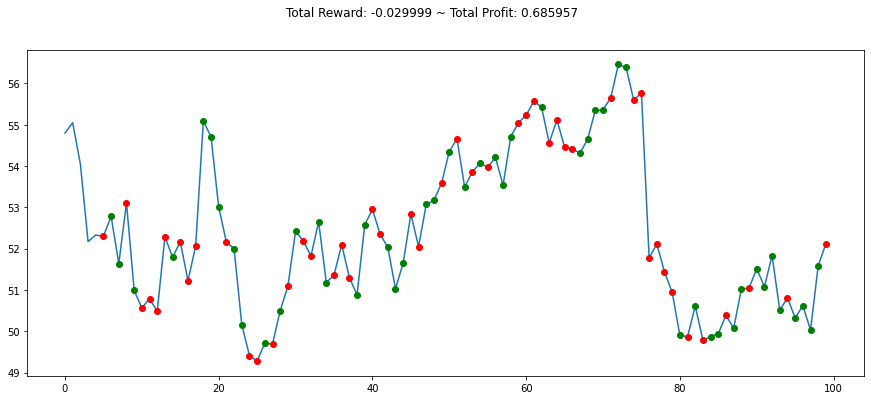

In [28]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## Adding Indicators
Simple Moving Average 'SMA'

Relative Strength Index 'RSI'

On Balance Volume 'OBV'

Market Momentum 'MOM'

In [29]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [30]:
#df_msft['BBANDS'] = TA.BBANDS(df_msft)
df_msft['SMA'] = TA.SMA(df_msft, 12)
df_msft['SSMA'] = TA.SSMA(df_msft, 12)
df_msft['STOCH'] = TA.STOCH(df_msft)
df_msft['DEMA'] = TA.DEMA(df_msft)
df_msft['OBV'] = TA.OBV(df_msft)
df_msft['RSI'] = TA.RSI(df_msft)
df_msft['EMA'] = TA.EMA(df_msft)
df_msft.fillna(0, inplace=True)

In [31]:
df_msft.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA,SSMA,STOCH,DEMA,OBV,RSI,EMA
Date,,,,,,,,,,,,,
2021-12-27,335.459991,342.480011,335.429993,342.450012,340.227112,19947000,332.022502,331.618104,94.951033,334.357080,2.546094e+09,59.270353,332.718968
2021-12-28,343.149994,343.809998,340.320007,341.250000,339.034882,15661500,332.701668,332.420762,90.361454,337.100629,2.530433e+09,58.131276,334.425174
2021-12-29,341.299988,344.299988,339.679993,341.950012,339.730377,15042000,332.652501,333.214866,91.312471,339.274480,2.545475e+09,58.630733,335.930142
2021-12-30,341.910004,343.130005,338.820007,339.320007,337.117401,15994500,332.645836,333.723628,81.589713,339.825964,2.529480e+09,55.931143,336.608115
2021-12-31,338.510010,339.359985,335.850006,336.320007,334.136902,18000800,333.310837,333.939993,70.499135,339.078675,2.511479e+09,52.936944,336.550493


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [33]:
df_test = df_msft[['Low','Volume','SSMA', 'STOCH', 'OBV', 'EMA','SMA','RSI','DEMA']]
df_test.tail(3)

,Low,Volume,SSMA,STOCH,OBV,EMA,SMA,RSI,DEMA
Date,,,,,,,,,
2021-12-29,339.679993,15042000,333.214866,91.312471,2.545475e+09,335.930142,332.652501,58.630733,339.274480
2021-12-30,338.820007,15994500,333.723628,81.589713,2.529480e+09,336.608115,332.645836,55.931143,339.825964
2021-12-31,335.850006,18000800,333.939993,70.499135,2.511479e+09,336.550493,333.310837,52.936944,339.078675


             Low    Volume      SSMA     STOCH       OBV       EMA       SMA  \
Low     1.000000 -0.019034  0.998218  0.084469  0.955579  0.999253  0.996987   
Volume -0.019034  1.000000  0.003291 -0.297359  0.040561 -0.004243 -0.008742   
SSMA    0.998218  0.003291  1.000000  0.044042  0.956637  0.999601  0.998034   
STOCH   0.084469 -0.297359  0.044042  1.000000  0.073680  0.057933  0.058547   
OBV     0.955579  0.040561  0.956637  0.073680  1.000000  0.956705  0.954726   
EMA     0.999253 -0.004243  0.999601  0.057933  0.956705  1.000000  0.998185   
SMA     0.996987 -0.008742  0.998034  0.058547  0.954726  0.998185  1.000000   
RSI     0.138225 -0.338044  0.096207  0.791819  0.113967  0.114296  0.118819   
DEMA    0.999695 -0.010456  0.998694  0.073482  0.956384  0.999708  0.997590   

             RSI      DEMA  
Low     0.138225  0.999695  
Volume -0.338044 -0.010456  
SSMA    0.096207  0.998694  
STOCH   0.791819  0.073482  
OBV     0.113967  0.956384  
EMA     0.114296  0.99970

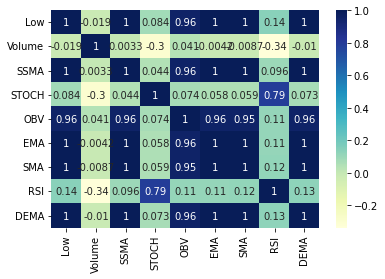

In [34]:
print(df_test.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df_test.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [42]:
len(df_msft)

1511

In [35]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','SMA', 'OBV','DEMA','EMA','SSMA']].to_numpy()[start:end]
    return prices, signal_features

class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df_msft, window_size=5, frame_bound=(90,110))

In [ ]:
env2.signal_features

In [37]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [43]:
model = PPO2('MlpPolicy', env, verbose = 1) 
model.learn(total_timesteps= 100000)

Wrapping the env in a DummyVecEnv.


Streaming output truncated to the last 5000 lines.
| n_updates          | 397            |
| policy_entropy     | 0.044240274    |
| policy_loss        | -3.2651005e-06 |
| serial_timesteps   | 50816          |
| time_elapsed       | 47.2           |
| total_timesteps    | 50816          |
| value_loss         | 0.087853014    |
---------------------------------------
--------------------------------------
| approxkl           | 4.914399e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.54          |
| fps                | 1098          |
| n_updates          | 398           |
| policy_entropy     | 0.045156863   |
| policy_loss        | 2.3414148e-05 |
| serial_timesteps   | 50944         |
| time_elapsed       | 47.3          |
| total_timesteps    | 50944         |
| value_loss         | 0.09000237    |
--------------------------------------
---------------------------------------
| approxkl           | 0.000100123616 |
| clipfrac           | 0.0            |
| 

In [38]:
model = A2C('MlpLstmPolicy', env, gamma=0.99, n_steps=5, learning_rate=0.0001, alpha=0.99, momentum=0, verbose=1) 
model.learn(total_timesteps= 100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




---------------------------------
| explained_variance | 0.219    |
| fps                | 13       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.0288   |
---------------------------------
---------------------------------
| explained_variance | -0.0104  |
| fps                | 240      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.693    |
---------------------------------
---------------------------------
| explained_variance | -24      |
| fps                | 256      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 0.000967 |
---------------------------------
---------------------------------
| explained_variance | 0.104    |
| fps                | 266      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

In [39]:
env = MyCustomEnv(df=df_msft, window_size=5, frame_bound=(90,110))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 2.30999755859375, 'total_profit': 0.9628103871847387, 'position': 1}


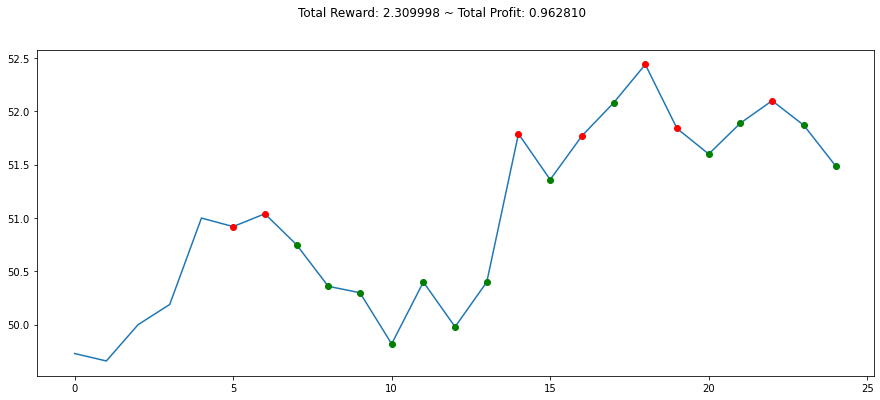

In [40]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

### lr = 0.0007, timesteps = 100000

In [ ]:
"""env = gym.make('stocks-v0', df=df_msft, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break"""

info {'total_reward': 0.5099945068359375, 'total_profit': 0.952326771677283, 'position': 1}


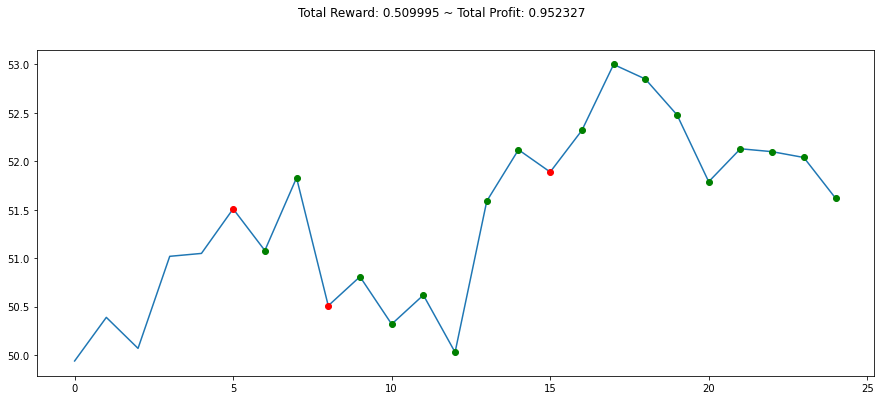

In [ ]:
"""plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()"""

### lr = 0.0007, timesteps = 50000 

In [ ]:
"""env = gym.make('stocks-v0', df=df_msft, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break"""

info {'total_reward': 2.9500083923339844, 'total_profit': 0.9392167182924406, 'position': 1}


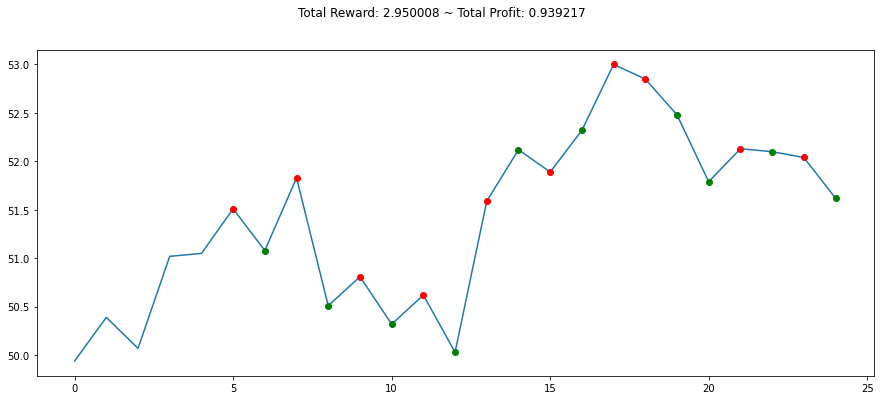

In [ ]:
"""plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()"""

lr = 0.0001, steps = 100000

In [ ]:
"""env = gym.make('stocks-v0', df=df_msft, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break"""

info {'total_reward': 1.5400009155273438, 'total_profit': 0.9559381074182507, 'position': 0}


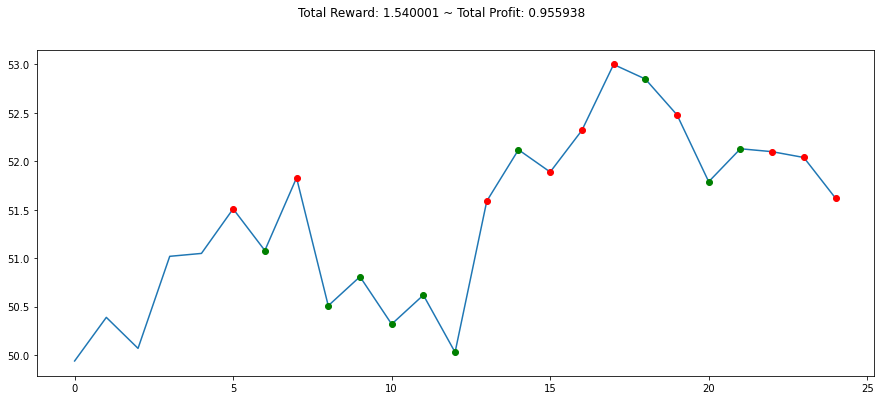

In [ ]:
"""plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()"""

### lr = 0.0007, timesteps = 150000 

In [ ]:
env = gym.make('stocks-v0', df=df_msft, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 3.210002899169922, 'total_profit': 0.972802946027341, 'position': 0}


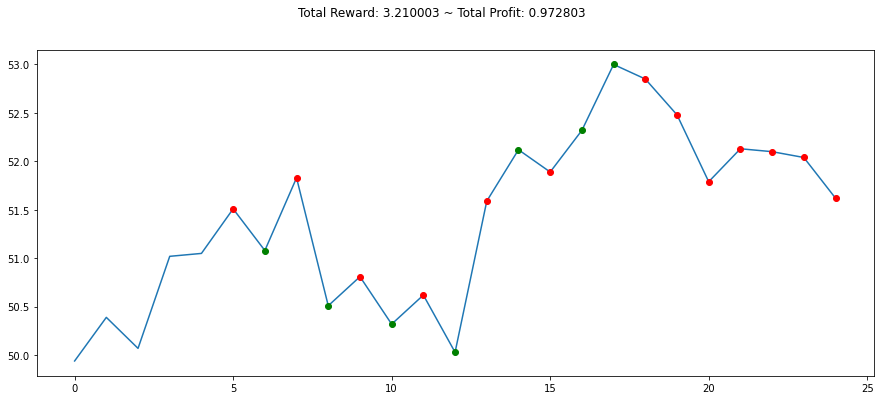

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()